TLV320AIC3204に内臓されている1st order IIR Filterを使って、DCリジェクション(HPF) b0,b1,a1の三つの係数を決定する。
符号付き24ビット整数。a1の符号が反対になることに留意。16進表記に変更するのが面倒。

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from scipy import signal

In [134]:
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * np.log10 (abs(h))
    pl.subplot(211)
    pl.plot(w/max(w),h_dB)
    pl.ylim(-80, 5)
    pl.ylabel('Magnitude (db)')
    pl.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    pl.title(r'Frequency response')
    pl.subplot(212)
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    pl.plot(w/np.max(w),h_Phase)
    pl.ylabel('Phase (radians)')
    pl.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    pl.title(r'Phase response')
    pl.subplots_adjust(hspace=0.5)
    pl.show()

1次のHPF。fc=0.0001*(fs/2) を指定。fs=48kHzなら、fc=2.4Hz

In [25]:
b, a = signal.iirfilter(1, [0.0001], btype='highpass')
b, a

(array([ 0.99984295, -0.99984295]), array([ 1.        , -0.99968589]))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


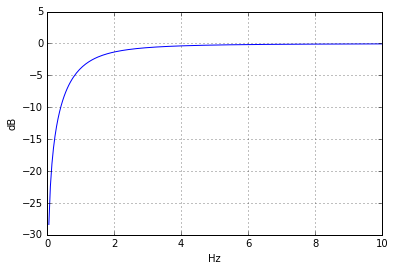

In [24]:
fs = 48e3
w,h = signal.freqz(b, a, worN=1<<18)
pl.grid()
pl.xlim(0,10)
pl.xlabel("Hz")
pl.ylabel("dB")
pl.plot((fs/2) * w / np.pi/2, 20*np.log10(h));

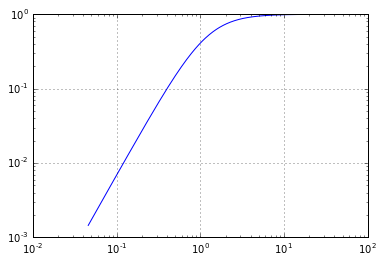

In [29]:
pl.xlim((1e-2, 1e2))
pl.grid()
pl.loglog((fs/2) * w / np.pi/2, h);

In [148]:
np.rint(a * 2**23), np.rint(b * 2**23)

(array([ 8388608., -8385973.]), array([ 8387291., -8387291.]))

In [149]:
al = list(np.vectorize(int)(a * 2**23))
bl = list(np.vectorize(int)(b * 2**23))

In [150]:
def to_bytes(n, length):
    return [(n >> i*8) & 0xff for i in reversed(range(length))]
def to_hex(n):
    return ", ".join([hex(int(x)) for x in to_bytes(n, 3)])

In [151]:
[to_hex(x) for x in bl]

['0x7f, 0xfa, 0xda', '0x80, 0x5, 0x26']

In [152]:
to_hex(-al[1])

'0x7f, 0xf5, 0xb5'